# boston 집 값(target) 예측
   - 총 14개의 컬럼이 있다.
   - 이 중 마지막 컬럼인 'target' 컬럼의 값을 예측.
   - 앞의 13개의 컬럼의 값으로 target 값을 유추하는 모델 작성.

# Column 의미 :
- CRIM: 범죄율
- ZN: 25,000평 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 남은 방 개수
- AGE: 1940년 이전에 건축된 주택의 비율
- DIS: 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 교사와 학생 수 비율
- B: 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)
- Target : 예측해야할 집 값

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()
dataFrame = pd.DataFrame(dataset['data'])
dataFrame.columns = dataset['feature_names']
dataFrame['target'] = dataset['target']

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
# 줄바꿈 없이 출력
pd.set_option('display.expand_frame_repr', False)  

row, col = dataFrame.shape
print(f'Column Names ({col}) : {dataFrame.columns.tolist()}\n')
print(f'Rows Num : {row}\n')
print(dataFrame.head(10))

Column Names (14) : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']

Rows Num : 506

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0     18.7  396.90   5.33    36.2
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0     18.7  394.12   5.21    28.7
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0     15.2  395.60  12.43    22.9
7  0.14455  12.5   7.87   0.0  

/home/enitt/miniconda3/envs/enitt/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

# sns.regplot() : 두 변수 간의 관계도를 시각화한다.
- Scatter 의미 : 산점도를 뜻한다. 두 변수의 값의 분포도를 뜻한다.
- Line 의미 : 회귀선을 뜻한다. 회귀선이 상승하면 두 변수 모두 상승, 회귀선이 하강하면 하나의 변수는 상승 다른 하나는 하강한다는 의미이다.

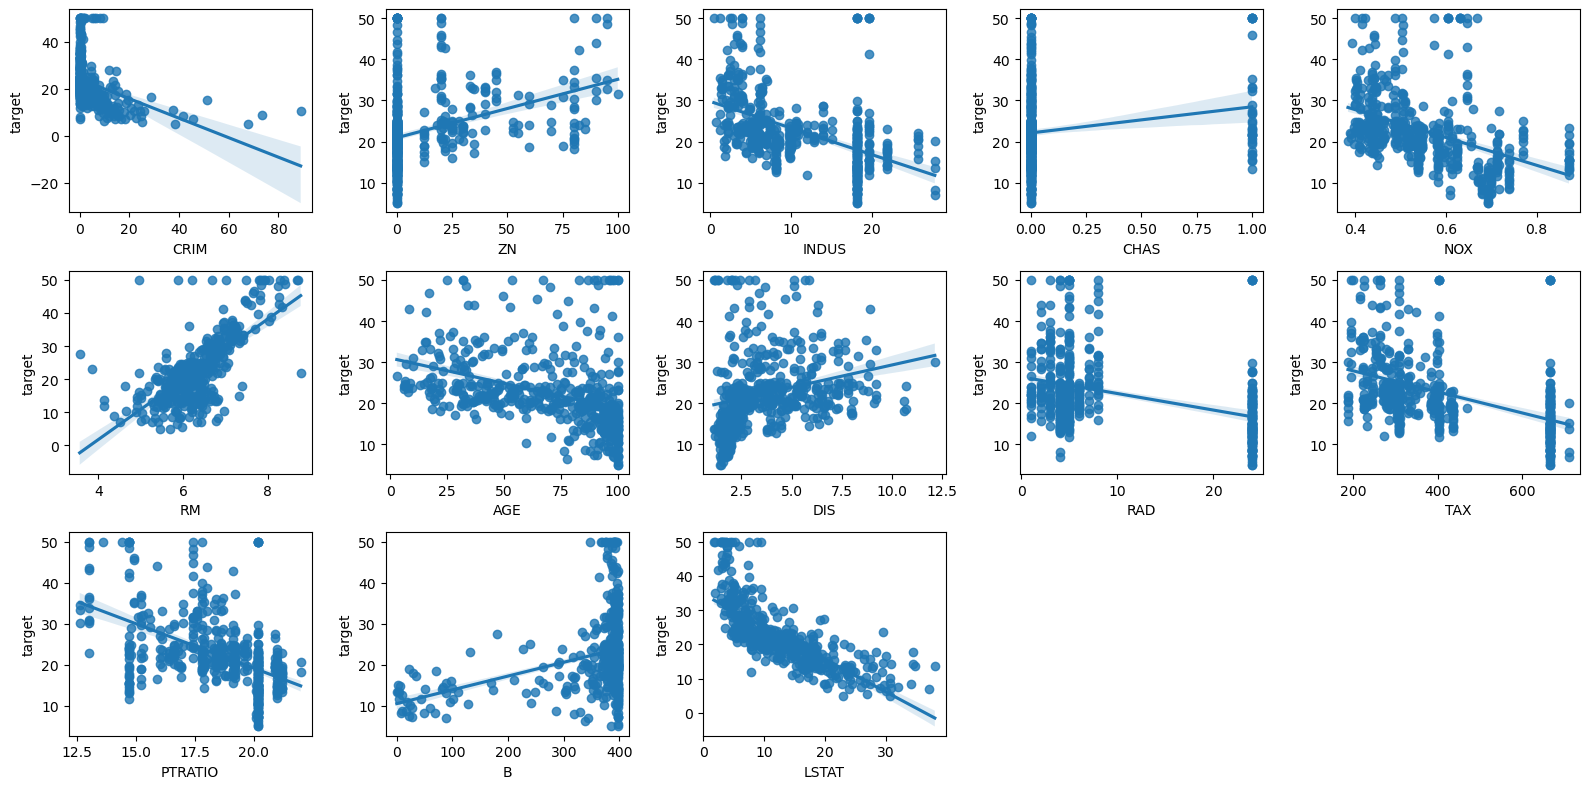

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(figsize=(16,8), nrows=3, ncols=5, tight_layout=True)
features = dataFrame.columns.tolist()[:13]

for idx, feature in enumerate(features):
    row = idx // 5
    col = idx % 5

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='target', data=dataFrame, ax=axs[row][col])
    
# 나머지 두 개의 subplot 삭제
for i in range(len(features), 3*5):
    plt.delaxes(axs.flatten()[i])

# 선형회귀 MLP (Multi-Layer Perceptron) 모델을 이용해 집 값 예측

![nn](./MLP모델.jpg)

In [3]:
import torch
import torch.nn as nn
# nn은 Neural Network의 약자로 딥러닝에 필요한 신경망이 들어있는 pytorch 라이브러리.

from torch.optim.adam import Adam

# 13개의 입력값을 가지고 100개의 출력을 내고
# 활성화 함수를 지나고
# 100개의 입력값을 가지고 1개의 예측결과값을 도출.
model = nn.Sequential(
    nn.Linear(13, 100), # Linear는 MLP 모델의 이름으로 (입력갯수, 출력갯수)
    nn.ReLU(), # 활성화 함수 ReLU 사용 (음수 0, 양수 자기 자신 값)
    nn.Linear(100,1) # 최종적으로 100개의 입력으로 1개의 출력.
)

In [4]:
X = dataFrame.iloc[:, :13].values # 정답을 제외한 feature를 X에 저장
Y = dataFrame['target'].values # target 값을 추출. (정답 값, 13번째 피처)

batch_size = 100
learning_rate = 0.001

optim = Adam(model.parameters(), lr=learning_rate) # 최적화 함수 Adam 사용.

In [5]:
for epoch in range(200):
    
    for i in range(len(X)//batch_size):
        start = i * batch_size
        end = start + batch_size
        
        # 데이터를 torch 실수형 tensor type으로 변환
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])
        
        # 위에서 등록해둔 Adam 최적화 기법 사용. 가중치들의 기울기들을 초기화한다.
        # 기울기들이 누적되면 안되기 때문. (이전 loop를 잊어야함.)
        optim.zero_grad() # 가중치의 기울기를 0으로 초기화
        pred = model(x) # 모델의 예측 값 계산.
        loss = nn.MSELoss()(pred, y) # MSE 손실함수 (예측값, 정답값) 생성
        loss.backward() # 오차 역전파로 loss 줄이기.
        optim.step() # 가중치 업데이트

    if epoch % 5 == 0:
        print(f'epoch{epoch:4d}\t\tloss:{loss.item():.2f}\t\tnow predict(0):{model(torch.FloatTensor(X[0, :13]))[0]:.2f}')

/home/enitt/miniconda3/envs/enitt/lib/python3.9/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch   0		loss:2656.57		now predict(0):-27.35
epoch   5		loss:854.83		now predict(0):29.93
epoch  10		loss:39.07		now predict(0):20.93
epoch  15		loss:59.09		now predict(0):25.42
epoch  20		loss:52.02		now predict(0):25.09
epoch  25		loss:48.16		now predict(0):24.98
epoch  30		loss:46.50		now predict(0):25.25
epoch  35		loss:44.76		now predict(0):25.38
epoch  40		loss:42.97		now predict(0):25.43
epoch  45		loss:41.74		now predict(0):25.46
epoch  50		loss:40.80		now predict(0):25.46
epoch  55		loss:40.13		now predict(0):25.45
epoch  60		loss:39.57		now predict(0):25.45
epoch  65		loss:39.12		now predict(0):25.47
epoch  70		loss:38.76		now predict(0):25.47
epoch  75		loss:38.52		now predict(0):25.44
epoch  80		loss:38.36		now predict(0):25.38
epoch  85		loss:38.19		now predict(0):25.34
epoch  90		loss:38.07		now predict(0):25.27
epoch  95		loss:37.97		now predict(0):25.19
epoch 100		loss:37.91		now predict(0):25.11
epoch 105		loss:37.76		now predict(0):25.06
epoch 110		loss:37.66		now p

# 모델에서 예측한 값 (prediction) 실제 정답 (target) 값 비교

In [6]:
# 위에서 학습하고온 model()의 성능평가.
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f'prediction : {prediction.item()} \n real : {real}')

prediction : 24.782018661499023 
 real : 24.0
